# ASSIGNMENT 3

#####  NAME: RISHAV KUMAR
#####  ROLL NO. 2301560042

My github account link : [Github](https://github.com/risav68111/AIML_Assignment)


------

# QUESTION 1


Dataset source : [CDC data](https://www.kaggle.com/datasets/spittman1248/cdc-data-nutrition-physical-activity-obesity/)



###  CDC Data: Nutrition, Physical Activity, & Obesity

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [145]:
df=pd.read_csv(r'C:\Users\risha\Documents\KRMU\AIML_assigment\datasets\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [146]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [148]:
df=df.drop(['Low_Confidence_Limit',
         'Total',
         'Data_Value_Alt', 
         'YearEnd','Topic',
         'Datasource',
         'Data_Value_Unit',
         'QuestionID',
         'ClassID',
         'TopicID',
         'DataValueTypeID',
         'Data_Value_Type',
         'Data_Value_Footnote_Symbol',
         'Data_Value_Footnote',
         'StratificationCategoryId1',
         'StratificationID1'], axis=1)


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                53392 non-null  int64  
 1   LocationAbbr             53392 non-null  object 
 2   LocationDesc             53392 non-null  object 
 3   Class                    53392 non-null  object 
 4   Question                 53392 non-null  object 
 5   Data_Value               48346 non-null  float64
 6   High_Confidence_Limit    48346 non-null  float64
 7   Sample_Size              48346 non-null  float64
 8   Age(years)               11438 non-null  object 
 9   Education                7628 non-null   object 
 10  Gender                   3814 non-null   object 
 11  Income                   13349 non-null  object 
 12  Race/Ethnicity           15256 non-null  object 
 13  GeoLocation              52384 non-null  object 
 14  LocationID            

In [150]:
df=df.drop(['GeoLocation',
            'Question', 
            'StratificationCategory1', 
            'Stratification1', 
            'Gender'], axis=1)


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               53392 non-null  int64  
 1   LocationAbbr            53392 non-null  object 
 2   LocationDesc            53392 non-null  object 
 3   Class                   53392 non-null  object 
 4   Data_Value              48346 non-null  float64
 5   High_Confidence_Limit   48346 non-null  float64
 6   Sample_Size             48346 non-null  float64
 7   Age(years)              11438 non-null  object 
 8   Education               7628 non-null   object 
 9   Income                  13349 non-null  object 
 10  Race/Ethnicity          15256 non-null  object 
 11  LocationID              53392 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 4.9+ MB


In [152]:
df=df.dropna(subset=['Education'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7628 entries, 3 to 53370
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               7628 non-null   int64  
 1   LocationAbbr            7628 non-null   object 
 2   LocationDesc            7628 non-null   object 
 3   Class                   7628 non-null   object 
 4   Data_Value              7628 non-null   float64
 5   High_Confidence_Limit   7628 non-null   float64
 6   Sample_Size             7628 non-null   float64
 7   Age(years)              0 non-null      object 
 8   Education               7628 non-null   object 
 9   Income                  0 non-null      object 
 10  Race/Ethnicity          0 non-null      object 
 11  LocationID              7628 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 774.7+ KB


In [154]:
def lower_col_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

In [155]:
df=lower_col_names(df)

In [156]:
df

,yearstart,locationabbr,locationdesc,class,data_value,high_confidence_limit,sample_size,age(years),education,income,race/ethnicity,locationid
3,2011,AL,Alabama,Obesity / Weight Status,33.6,37.6,1153.0,NaN,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,Obesity / Weight Status,32.8,35.6,2402.0,NaN,High school graduate,NaN,NaN,1
5,2011,AL,Alabama,Obesity / Weight Status,33.8,36.8,1925.0,NaN,Some college or technical school,NaN,NaN,1
6,2011,AL,Alabama,Obesity / Weight Status,26.4,29.3,1812.0,NaN,College graduate,NaN,NaN,1
31,2011,AL,Alabama,Obesity / Weight Status,33.2,37.5,1153.0,NaN,Less than high school,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53343,2016,PR,Puerto Rico,Physical Activity,33.9,36.8,1735.0,NaN,College graduate,NaN,NaN,72
53367,2016,VI,Virgin Islands,Physical Activity,29.2,38.6,238.0,NaN,Less than high school,NaN,NaN,78
53368,2016,VI,Virgin Islands,Physical Activity,26.9,33.5,394.0,NaN,High school graduate,NaN,NaN,78
53369,2016,VI,Virgin Islands,Physical Activity,31.2,41.8,230.0,NaN,Some college or technical school,NaN,NaN,78


In [157]:
df.dtypes

yearstart                   int64
locationabbr               object
locationdesc               object
class                      object
data_value                float64
high_confidence_limit     float64
sample_size               float64
age(years)                 object
education                  object
income                     object
race/ethnicity             object
locationid                  int64
dtype: object

In [158]:
print(df.duplicated().sum())

3


In [159]:
df= df.drop_duplicates()

In [160]:
df.isna().sum()

yearstart                    0
locationabbr                 0
locationdesc                 0
class                        0
data_value                   0
high_confidence_limit        0
sample_size                  0
age(years)                7625
education                    0
income                    7625
race/ethnicity            7625
locationid                   0
dtype: int64

In [161]:
df.shape

(7625, 12)

In [162]:
df=df.drop(['age(years)', 'income', 'race/ethnicity'], axis=1)

In [163]:
p= df.isnull().sum() * 100 / len(df)
p

yearstart                 0.0
locationabbr              0.0
locationdesc              0.0
class                     0.0
data_value                0.0
high_confidence_limit     0.0
sample_size               0.0
education                 0.0
locationid                0.0
dtype: float64

####  Removing Outliers



In [164]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [165]:
remove_outliers(df)
df

,yearstart,locationabbr,locationdesc,class,data_value,high_confidence_limit,sample_size,education,locationid
3,2011,AL,Alabama,Obesity / Weight Status,33.6,37.6,1153.0,Less than high school,1
4,2011,AL,Alabama,Obesity / Weight Status,32.8,35.6,2402.0,High school graduate,1
5,2011,AL,Alabama,Obesity / Weight Status,33.8,36.8,1925.0,Some college or technical school,1
6,2011,AL,Alabama,Obesity / Weight Status,26.4,29.3,1812.0,College graduate,1
31,2011,AL,Alabama,Obesity / Weight Status,33.2,37.5,1153.0,Less than high school,1
...,...,...,...,...,...,...,...,...,...
53343,2016,PR,Puerto Rico,Physical Activity,33.9,36.8,1735.0,College graduate,72
53367,2016,VI,Virgin Islands,Physical Activity,29.2,38.6,238.0,Less than high school,78
53368,2016,VI,Virgin Islands,Physical Activity,26.9,33.5,394.0,High school graduate,78
53369,2016,VI,Virgin Islands,Physical Activity,31.2,41.8,230.0,Some college or technical school,78


In [166]:
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

### Standardizing the text in the data

In [167]:
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

In [168]:
standardize_text(df)

In [169]:
num_col= df.select_dtypes(include=['int','float']).columns
num= df[num_col]

In [170]:
num

,yearstart,data_value,high_confidence_limit,sample_size,locationid
3,2011,33.6,37.6,1153.0,1
4,2011,32.8,35.6,2402.0,1
5,2011,33.8,36.8,1925.0,1
6,2011,26.4,29.3,1812.0,1
31,2011,33.2,37.5,1153.0,1
...,...,...,...,...,...
53343,2016,33.9,36.8,1735.0,72
53367,2016,29.2,38.6,238.0,78
53368,2016,26.9,33.5,394.0,78
53369,2016,31.2,41.8,230.0,78


In [171]:
num.isna().sum()

yearstart                 0
data_value                0
high_confidence_limit     0
sample_size               0
locationid                0
dtype: int64

In [172]:
cat_col= df.select_dtypes(include=['object']).columns
cat= df[cat_col]

In [173]:
cat

,locationabbr,locationdesc,class,education
3,al,alabama,obesity / weight status,less than high school
4,al,alabama,obesity / weight status,high school graduate
5,al,alabama,obesity / weight status,some college or technical school
6,al,alabama,obesity / weight status,college graduate
31,al,alabama,obesity / weight status,less than high school
...,...,...,...,...
53343,pr,puerto rico,physical activity,college graduate
53367,vi,virgin islands,physical activity,less than high school
53368,vi,virgin islands,physical activity,high school graduate
53369,vi,virgin islands,physical activity,some college or technical school


#### One-Hot Encoding for Categorical variables


In [174]:
cat.columns

Index(['locationabbr', 'locationdesc', 'class', 'education'], dtype='object')

In [175]:
#education
ed_map = {'less than high school': 0, 'high school graduate':1, 'some college or technical school':2,'college graduate':3}
ed_map
df['education'] = df['education'].map(ed_map)

In [176]:
df

,yearstart,locationabbr,locationdesc,class,data_value,high_confidence_limit,sample_size,education,locationid
3,2011,al,alabama,obesity / weight status,33.6,37.6,1153.0,0,1
4,2011,al,alabama,obesity / weight status,32.8,35.6,2402.0,1,1
5,2011,al,alabama,obesity / weight status,33.8,36.8,1925.0,2,1
6,2011,al,alabama,obesity / weight status,26.4,29.3,1812.0,3,1
31,2011,al,alabama,obesity / weight status,33.2,37.5,1153.0,0,1
...,...,...,...,...,...,...,...,...,...
53343,2016,pr,puerto rico,physical activity,33.9,36.8,1735.0,3,72
53367,2016,vi,virgin islands,physical activity,29.2,38.6,238.0,0,78
53368,2016,vi,virgin islands,physical activity,26.9,33.5,394.0,1,78
53369,2016,vi,virgin islands,physical activity,31.2,41.8,230.0,2,78


### Ploting distributions of numerical data

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


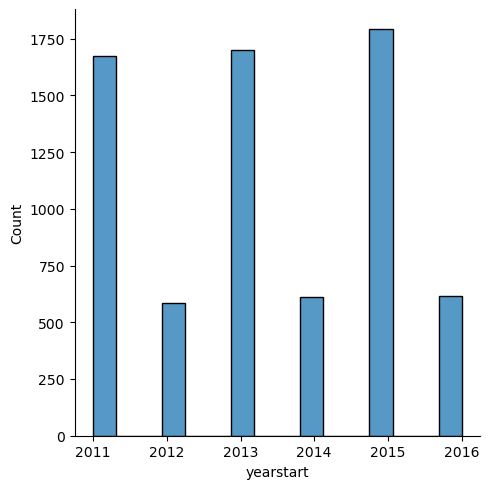

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


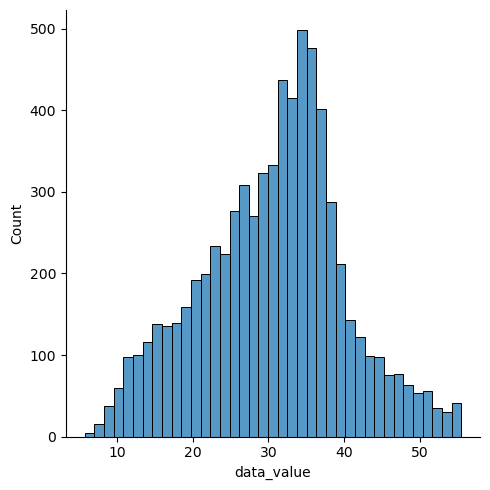

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


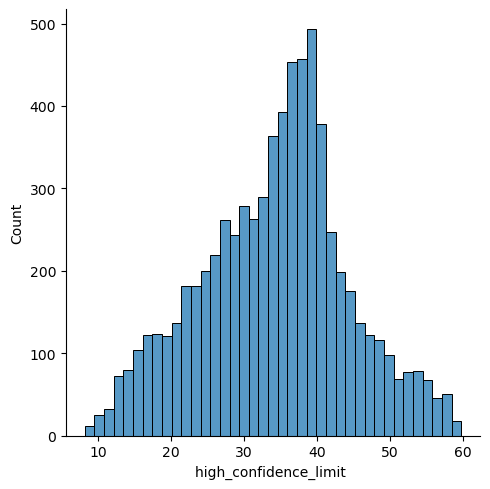

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


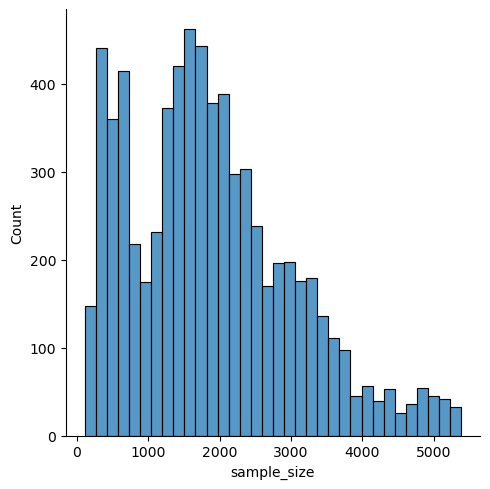

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


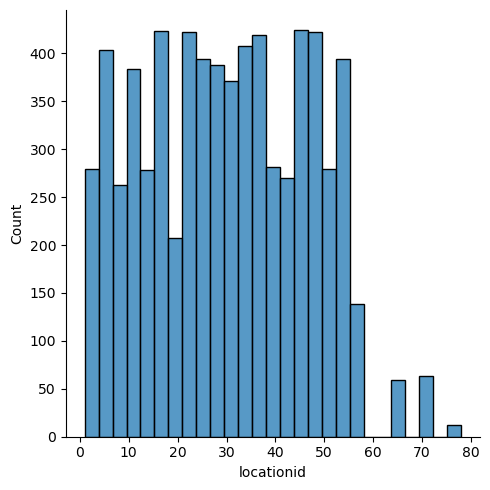

In [177]:
for col in num.columns:
    sns.displot(num[col])
    plt.show()

In [178]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6981 entries, 3 to 53370
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yearstart               6981 non-null   int64  
 1   data_value              6981 non-null   float64
 2   high_confidence_limit   6981 non-null   float64
 3   sample_size             6981 non-null   float64
 4   locationid              6981 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 327.2 KB


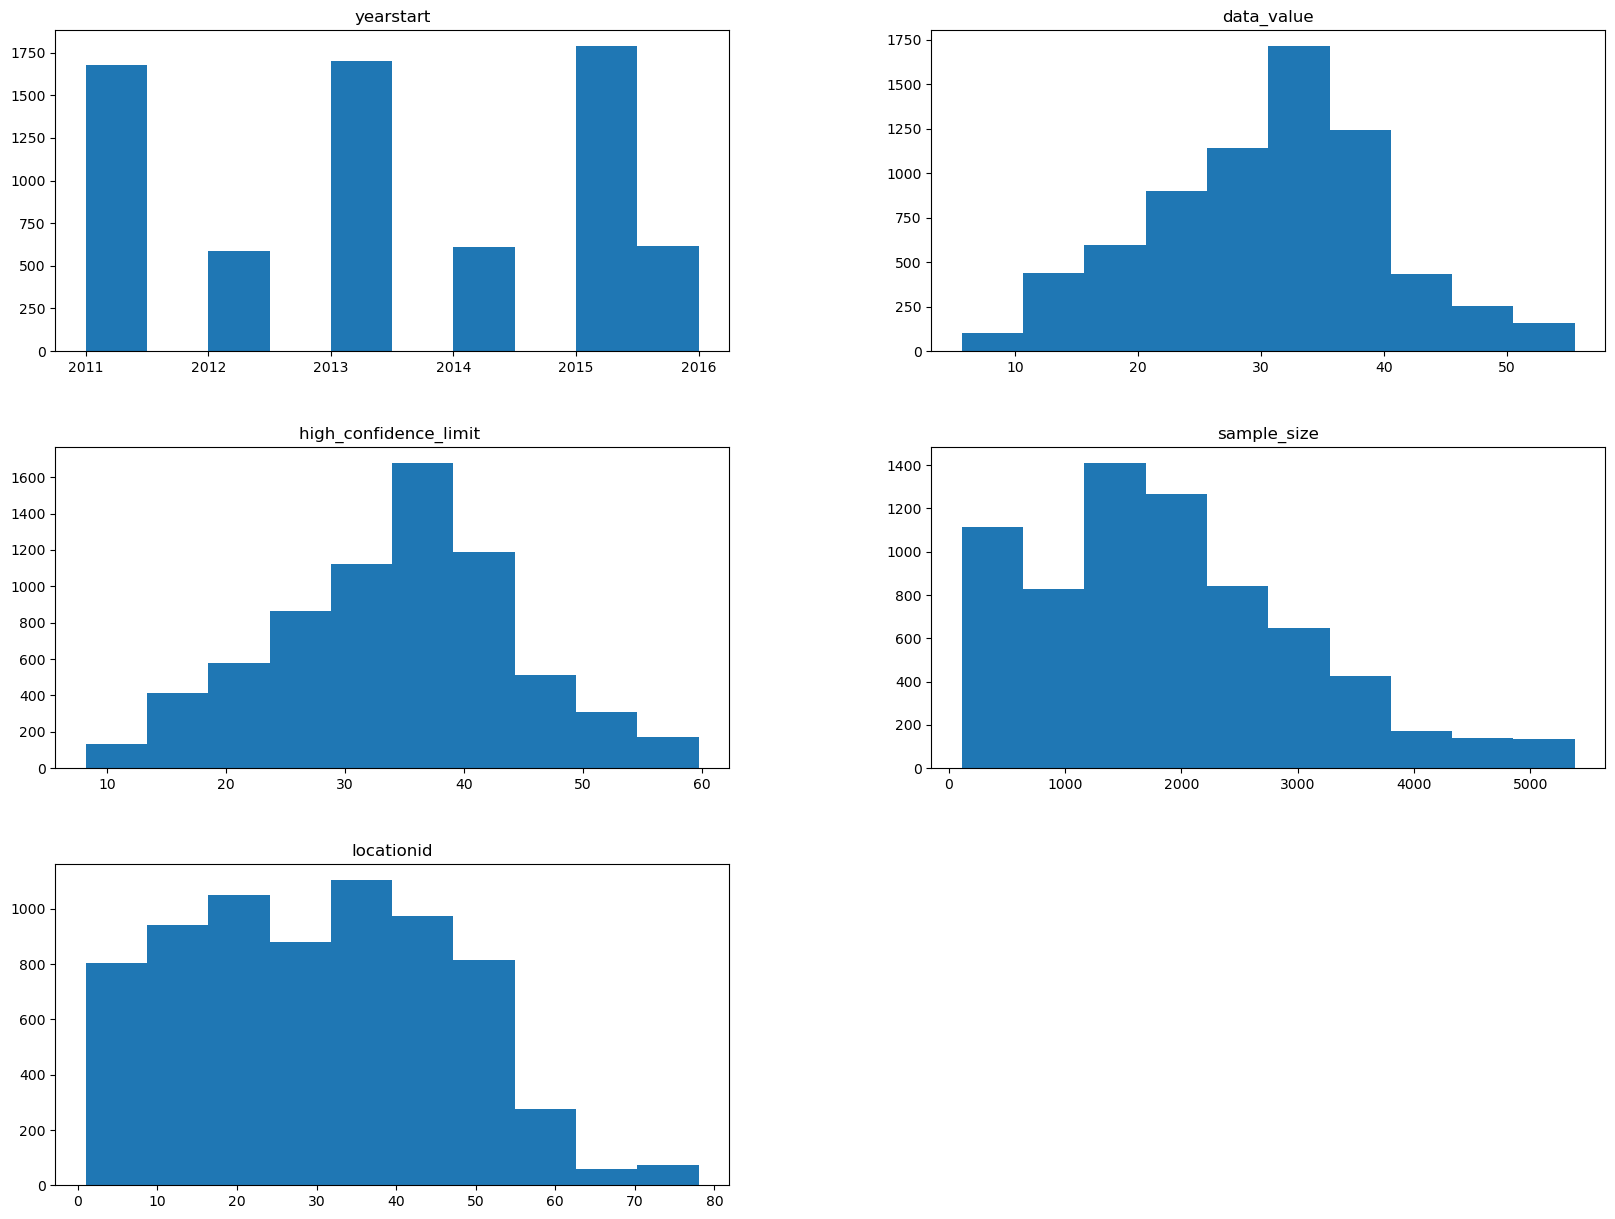

In [179]:
num.hist(figsize=(20,15), grid=False)
plt.show()

### Plot relationships between Numerical variables

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


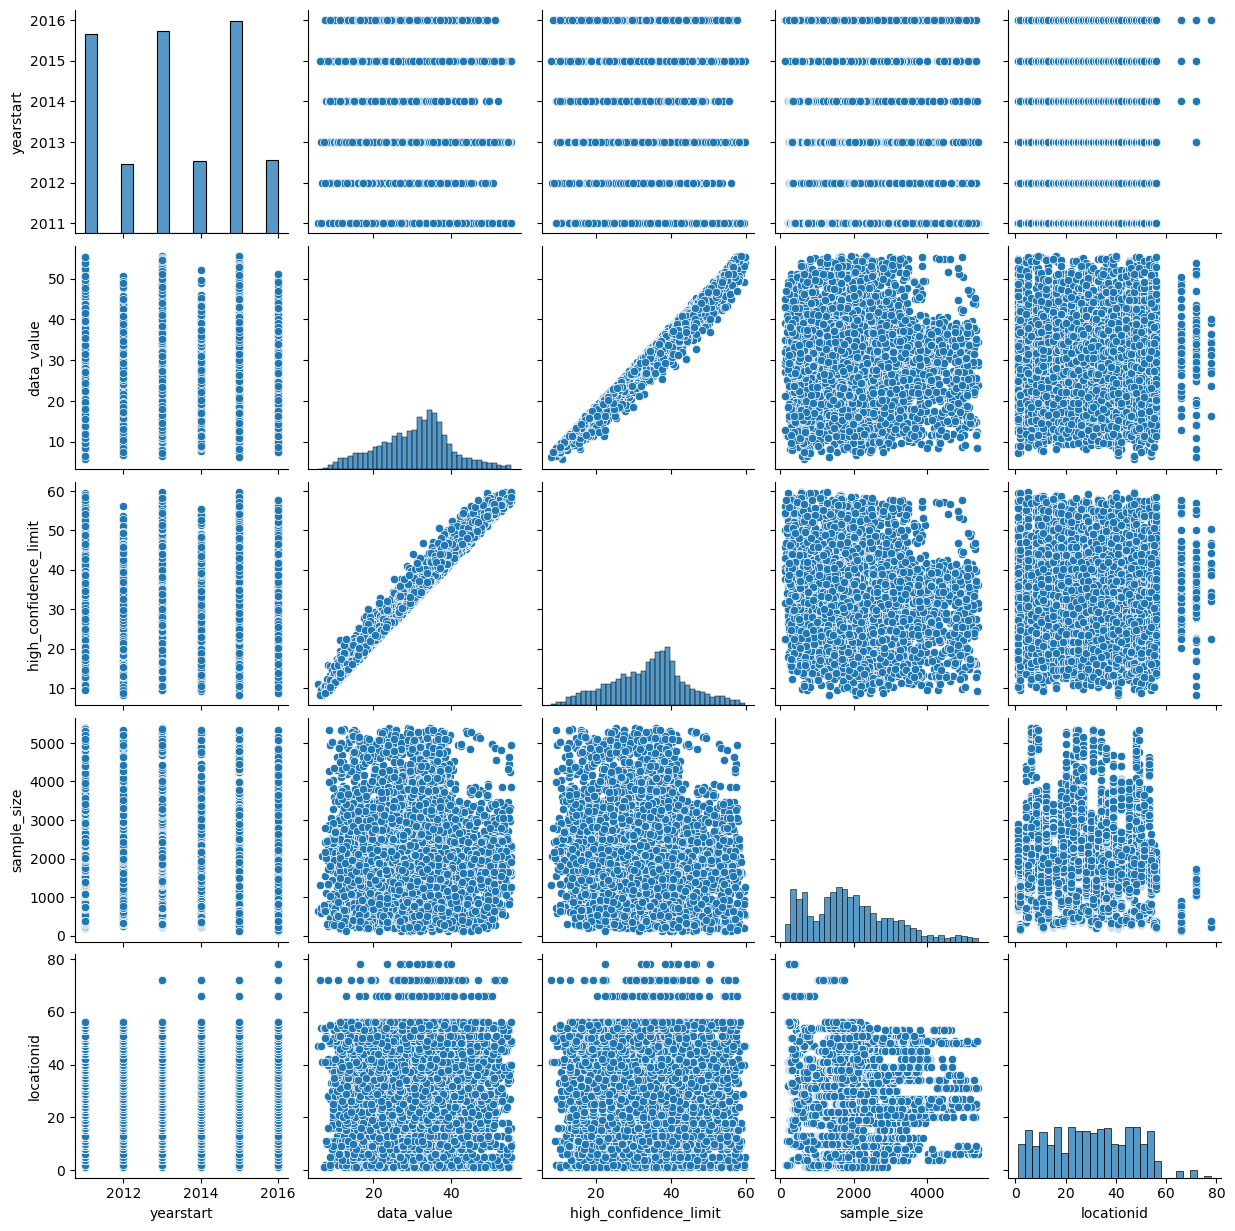

In [180]:
sns.pairplot(num)

In [181]:
num.corr()

,yearstart,data_value,high_confidence_limit,sample_size,locationid
yearstart,1.000000,0.016473,0.027124,-0.079420,0.044380
data_value,0.016473,1.000000,0.985289,-0.114799,-0.003580
high_confidence_limit,0.027124,0.985289,1.000000,-0.244810,-0.008292
sample_size,-0.079420,-0.114799,-0.244810,1.000000,0.014860
locationid,0.044380,-0.003580,-0.008292,0.014860,1.000000


<Axes: >

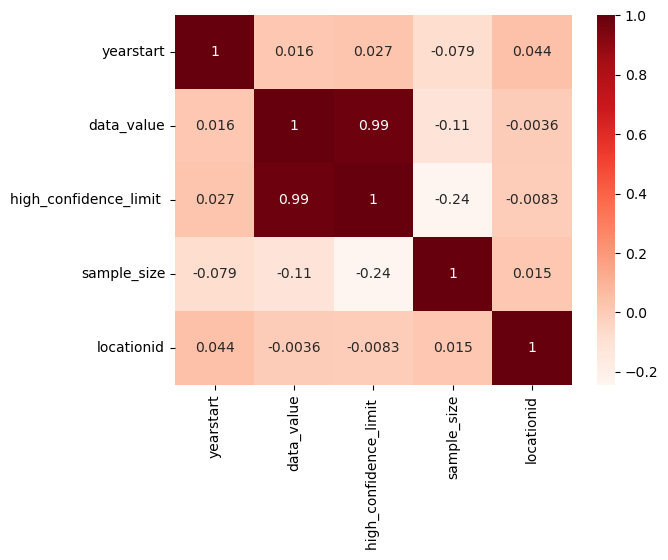

In [182]:
corr = num.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True, cmap='Reds')

### X/Y split

In [183]:
X = df[['yearstart','education', 'locationid']]
y = num['data_value']

###  Train/test split 

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,yearstart,education,locationid
1554,2011,2,4
44270,2015,0,48
49482,2016,0,27


In [185]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [186]:
X_test_scaled=std_scaler.transform(X_test)

In [187]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-1.35237549  0.5057009  -1.5542574 ]
 [ 1.00941761 -1.304449    1.09607354]
 [ 1.59986588 -1.304449   -0.16885714]
 ...
 [ 0.41896933 -1.304449   -1.31331823]
 [-0.17147894 -1.304449   -0.04838755]
 [-1.35237549 -1.304449    0.13231683]]
--------
[[-1.35237549 -1.304449   -0.47003111]
 [-1.35237549 -1.304449    1.03583875]
 [ 1.59986588  1.41077586  1.45748231]
 ...
 [ 1.00941761  0.5057009   0.91536916]
 [ 1.00941761 -1.304449   -1.67472699]
 [ 1.00941761  1.41077586  0.85513436]]


###  creating the model

In [188]:
X_train_const_scaled = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_const_scaled).fit()

predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) 

predictions_test = model.predict(X_test_const_scaled) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             data_value   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     75.06
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.86e-47
Time:                        19:53:43   Log-Likelihood:                -17814.
No. Observations:                4886   AIC:                         3.564e+04
Df Residuals:                    4882   BIC:                         3.566e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5540      0.133    230.236      0.0

In [189]:
predictions_test

array([32.86055392, 32.78782002, 28.0440551 , ..., 29.73224217,
       33.44395935, 27.94184409])

In [190]:
model.rsquared_adj

0.04350126253228659

### model fitting

In [191]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### model parameters

In [192]:
model.coef_

array([ 0.13130458, -1.79330744, -0.00290936])

In [193]:
model.intercept_

-231.12894549757587

In [194]:
model.score(X_test_scaled,y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-763.7470941180625

### models prediction

In [195]:
y_pred=model.predict(X_test_scaled)  

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [196]:
y_test

12360    11.4
29126    34.1
53235    14.4
37772    48.1
48752    37.6
         ... 
28966    37.2
29444    35.5
43878    32.8
45857    36.7
37401    11.3
Name: data_value, Length: 2095, dtype: float64

In [197]:
y_pred

array([-228.96587301, -228.97025412, -233.45307096, ..., -231.90594467,
       -228.65225387, -233.52884707])

In [198]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

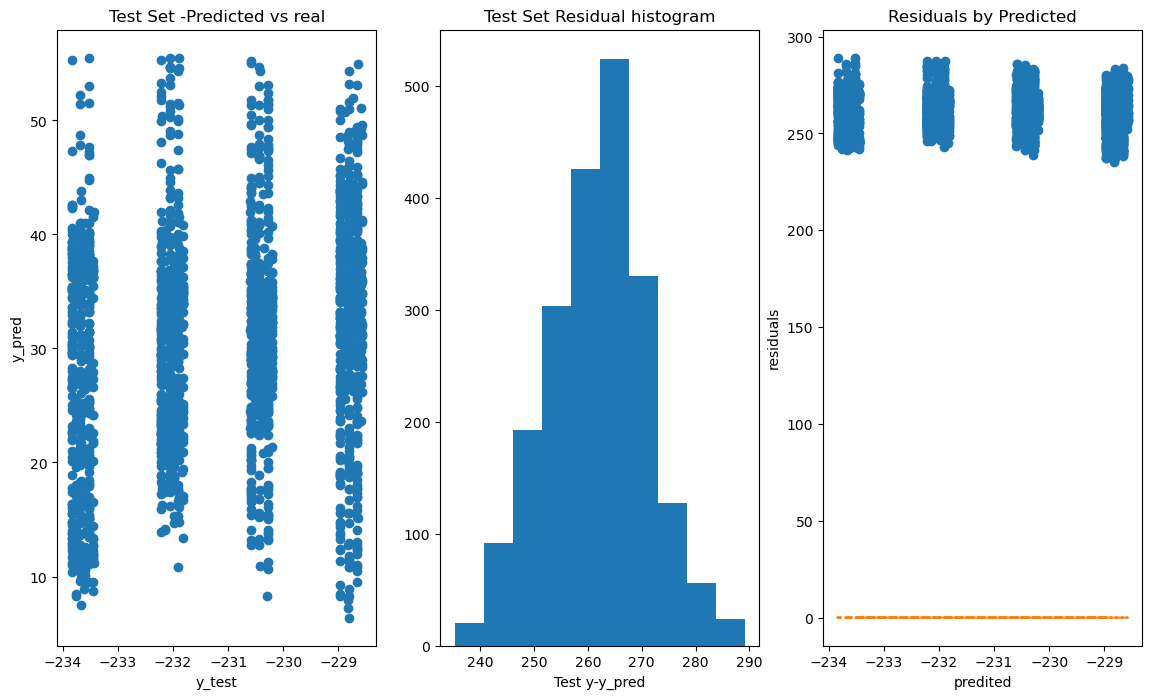

In [212]:
fig, ax = plt.subplots(1,3,figsize=(14,8))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


<Axes: xlabel='y_test', ylabel='y_pred'>

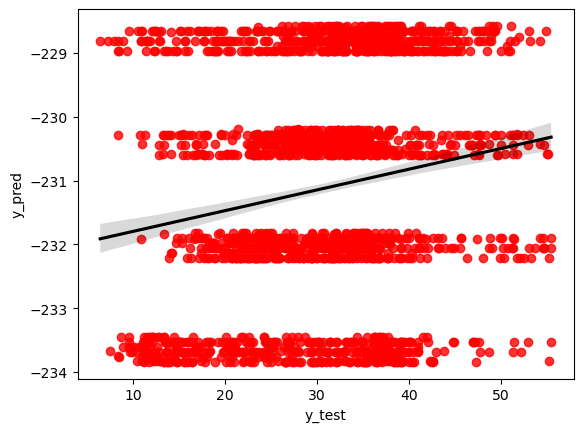

In [200]:
sns.regplot(x='y_test',y='y_pred', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Evaluating the model using mean squared error and R-squared


In [201]:
mse = mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2= 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)


Mean Squared Error: 68615.14527721175
R-squared: -763.7470941180625
Adjusted R-squared: -764.8442922444872


In [202]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [203]:
features_importances

,Attribute,Importance
1,education,1.793307
0,yearstart,0.131305
2,locationid,0.002909


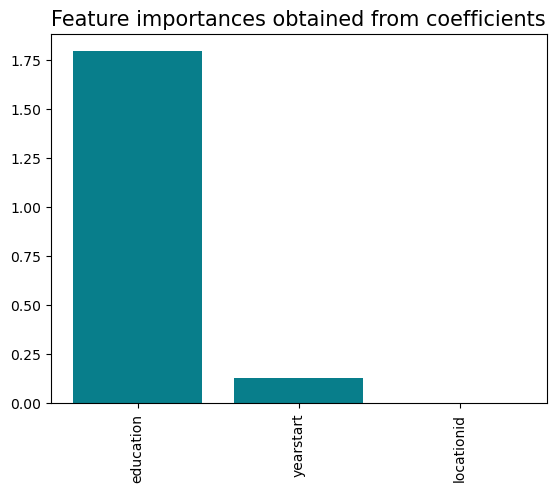

In [204]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

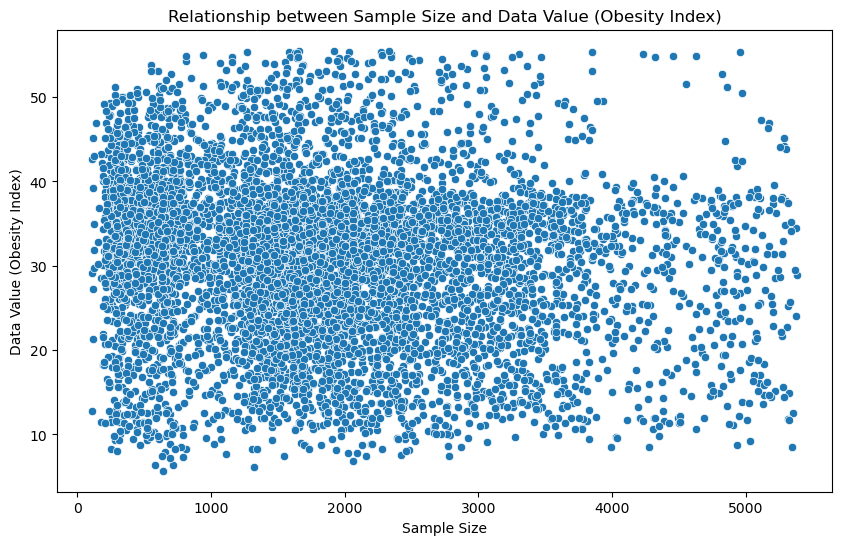

In [205]:
plt.figure(figsize=(10, 6))
sns.scatterplot( data=df,x='sample_size', y='data_value')
plt.title('Relationship between Sample Size and Data Value (Obesity Index)')
plt.xlabel('Sample Size')
plt.ylabel('Data Value (Obesity Index)')
plt.show()

In [206]:
df.columns

Index(['yearstart', 'locationabbr', 'locationdesc', 'class', 'data_value',
       'high_confidence_limit ', 'sample_size', 'education', 'locationid'],
      dtype='object')

In [207]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='high')

ValueError: Could not interpret value `high` for parameter `x`

<Figure size 1000x600 with 0 Axes>